서울시 따릉이 대여량 예측 경진대회

Import

In [6]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import zipfile
import os

Data Preparation

In [4]:
import urllib.request

url = 'https://bit.ly/3gLj0Q6'

try:
    urllib.request.urlretrieve(url, "data.zip")

    with zipfile.ZipFile('data.zip', 'r') as existing_zip:
        if not os.path.exists("./data"):
            os.mkdir("data")
        existing_zip.extractall('data')
except:
    print("Download Failure.")

In [2]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [3]:
train_df.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


<AxesSubplot: >

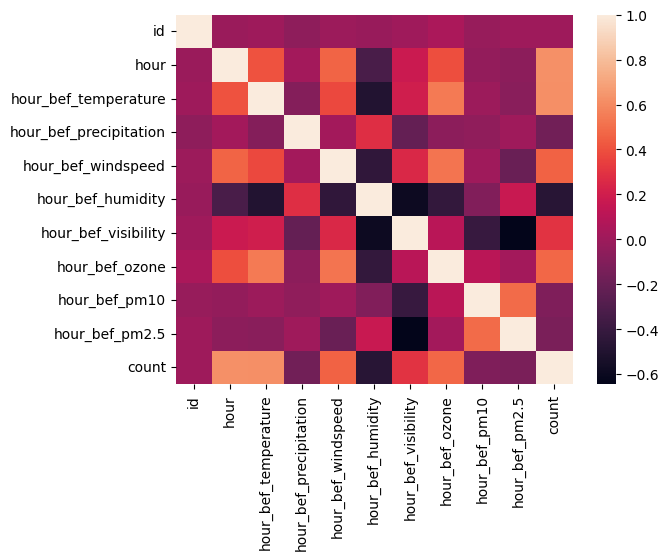

In [9]:
sns.heatmap(train_df.corr())

### 해석
`count`와 연관된 값 (절대값 0 이상)
- hour
- hour_bef_temperature
- hour_bef_ozone
- hour_bef_windspeed
- hour_bef_visibility
- hour_bef_humidity (Neg)

`count`와 덜 연관된 값 (절대값 0 수렴)
- hour_bef_precipitation
- hour_bef_pm10
- hour_bef_pm2.5

